1. ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏÑ§Ïπò

In [ ]:
!pip install --upgrade google_cloud_aiplatform

In [ ]:
import IPython

app = IPython.Application.instance()
app.kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}

2. ÌôòÍ≤ΩÎ≥ÄÏàò ÏÑ§Ï†ï

In [ ]:
import vertexai
PROJECT_ID=!gcloud config get-value project
PROJECT_ID=PROJECT_ID[0]
LOCATION="us-east1"

vertexai.init(project=PROJECT_ID, location=LOCATION)

3. Î™®Îç∏ ÌôúÏö©

3.1 Î™®Îç∏ ÏÉùÏÑ±

In [ ]:
from vertexai.generative_models import GenerativeModel

model = GenerativeModel("gemini-1.5-pro")

3.2 Ìï®Ïàò ÏÉùÏÑ±

In [ ]:
import typing
import IPython

from vertexai.generative_models import (
    Image,
    Part,
)
from PIL import Image as PIL_Image
from PIL import ImageOps as PIL_ImageOps

def get_gcs_image(gcs_uri: str, image_name:str="./image.jpg"):
  !gsutil cp $gcs_uri $image_name

def print_multimodal_prompt(contents: list):
  for content in contents:
    if isinstance(content, Image):
      display_images([content])
    elif isinstance(content, Part):
      image = download_image(content.file_data.file_uri)
      display_images([image])
    else:
      print(content)

def display_images(images:typing.Iterable[Image],
                   max_width: int=600,
                   max_height: int=350,
                   ):
  for image in images:
    pil_image = typing.cast(PIL_Image.Image, image._pil_image)
    if pil_image.mode != "RGB":
      pil_image = pil_image.convert("RGB")

    image_width, image_height = pil_image.size
    if max_width<image_width or max_height<image_height:
      pil_image = PIL_ImageOps.contain(pil_image, (max_width, max_height))

    IPython.display.display(pil_image)
def download_image(gcs_uri: str):
  url = gcs_uri

  if gcs_uri.startswith("gs://"):
    url = f"https://storage.googleapis.com/{gcs_uri.replace('gs://','').replace(' ', '%20')}"

  image_name="download_image.jpg"

  !curl -o $image_name $url
  return Image.load_from_file(image_name)



3.3 Ïù¥ÎØ∏ÏßÄ Î∂ÑÏÑù

Copying gs://cloud-samples-data/generative-ai/image/320px-Felis_catus-cat_on_snow.jpg...
/ [1 files][ 17.4 KiB/ 17.4 KiB]                                                
Operation completed over 1 objects/17.4 KiB.                                     
-------Prompt--------


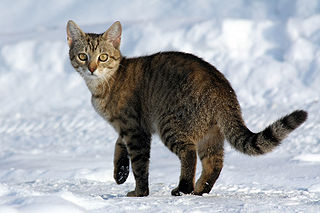

Ïù¥ Í∑∏Î¶ºÏóê ÎåÄÌï¥ ÏÑ§Î™ÖÌï¥ Ï£ºÏÑ∏Ïöî?

-------Response--------
Îàà ÏÜçÏóê ÏÑú ÏûàÎäî Í≥†ÏñëÏù¥Ïùò ÏÇ¨ÏßÑÏûÖÎãàÎã§. Í≥†ÏñëÏù¥Îäî ÏñºÎ£©ÎçúÎ£©Ìïú ÌöåÏÉâÍ≥º Í∞àÏÉâÏùò ÌÑ∏ÏùÑ Í∞ÄÏßÄÍ≥† ÏûàÏúºÎ©∞ ÎÖ∏ÎûÄÏÉâ ÎààÏùÑ Í∞ÄÏßÄÍ≥† ÏûàÏäµÎãàÎã§. Í≥†ÏñëÏù¥Îäî Ïπ¥Î©îÎùºÎ•º Î∞îÎùºÎ≥¥Í≥† ÏûàÏäµÎãàÎã§. Îàà ÏÜçÏóêÎäî Í≥†ÏñëÏù¥ Î∞úÏûêÍµ≠Ïù¥ ÏûàÏäµÎãàÎã§.


In [ ]:
gcs_uri = "gs://cloud-samples-data/generative-ai/image/320px-Felis_catus-cat_on_snow.jpg"
get_gcs_image(gcs_uri)

# Load from local file
image = Image.load_from_file("image.jpg")

# Prepare contents
prompt = "Ïù¥ Í∑∏Î¶ºÏóê ÎåÄÌï¥ ÏÑ§Î™ÖÌï¥ Ï£ºÏÑ∏Ïöî?"
contents = [image, prompt]

response = model.generate_content(contents)

print("-------Prompt--------")
print_multimodal_prompt(contents)

print("\n-------Response--------")
print(response.text)

-------Prompt--------
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 83606  100 83606    0     0   539k      0 --:--:-- --:--:-- --:--:--  537k


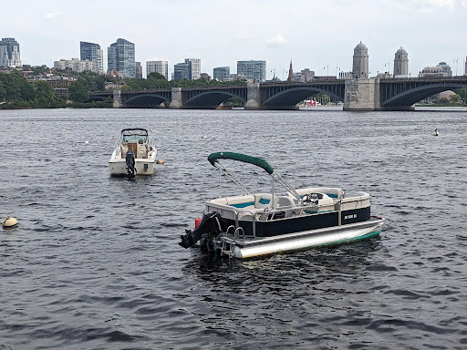

Í∑∏Î¶ºÏóê ÎåÄÌïú ÏÉÅÌô©ÏùÑ ÏÑ§Î™ÖÌï¥ Ï£ºÏÜå Ïñ¥Ïö∏Î¶¨Îäî Ïò∑ Ï∂îÏ≤úÌï¥Ï§ò?

-------Response--------
 ÏÇ¨ÏßÑÏùÄ Í∞ïÏóê Îëê Ï≤ôÏùò Î≥¥Ìä∏Í∞Ä Îñ† ÏûàÎäî Î™®ÏäµÏùÑ Î≥¥Ïó¨Ï§çÎãàÎã§. Ïò§Î•∏Ï™Ω Î≥¥Ìä∏Îäî Ìè∞Ìà∞ Î≥¥Ìä∏Ïù¥Í≥† ÏôºÏ™Ω Î≥¥Ìä∏Îäî ÏÜåÌòï Î™®ÌÑ∞Î≥¥Ìä∏ÏûÖÎãàÎã§. Î≥¥Ìä∏Îäî Í∞ïÍ∞ÄÏóê ÏûàÎäî ÎèÑÏãúÏùò Ïä§Ïπ¥Ïù¥ÎùºÏù∏ÏùÑ Î∞∞Í≤ΩÏúºÎ°ú ÌïòÍ≥† ÏûàÏäµÎãàÎã§.

Ïù¥ ÏÇ¨ÏßÑÏùÑ Ï∞çÏùÄ ÏÇ¨ÎûåÏùÄ Î≥¥Ìä∏Î•º ÌÉÄÍ≥† Í∞ïÏóêÏÑú Ìú¥ÏãùÏùÑ Ï∑®ÌïòÍ≥† ÏûàÎäî Í≤É Í∞ôÏäµÎãàÎã§. ÎÇ†Ïî®Í∞Ä Ï¢ãÏïÑ Î≥¥Ïù¥Í≥† ÏàòÎ©¥Ïù¥ ÏûîÏûîÌï¥ÏÑú Î≥¥Ìä∏Î•º ÌÉÄÍ∏∞Ïóê ÏôÑÎ≤ΩÌïú ÎÇ†ÏûÖÎãàÎã§.

Ïò∑ÏùÑ Ï∂îÏ≤úÌï¥ Îã¨ÎùºÍ≥† ÌïòÏÖ®ÎäîÎç∞, ÏÇ¨ÏßÑÏóê ÎÇòÏò® ÏÇ¨ÎûåÏù¥ ÏóÜÏñ¥ÏÑú Ïñ¥Îñ§ Ïò∑ÏùÑ ÏûÖÏñ¥Ïïº Ìï†ÏßÄ Î™®Î•¥Í≤†ÏäµÎãàÎã§. Îã§Îßå, ÎÇ†Ïî®Í∞Ä Ï¢ãÏïÑ Î≥¥Ïù¥Îãà Î∞òÎ∞îÏßÄÏôÄ Ìã∞ÏÖîÏ∏†Î•º ÏûÖÏúºÎ©¥ Ï¢ãÏùÑ Í≤É Í∞ôÏäµÎãàÎã§. üòâ

In [ ]:
# Load image from Cloud Storage URI
gcs_uri = "gs://cloud-samples-data/generative-ai/image/boats.jpeg"

# Prepare contents
image = Part.from_uri(gcs_uri, mime_type="image/jpeg")
prompt = "Í∑∏Î¶ºÏóê ÎåÄÌïú ÏÉÅÌô©ÏùÑ ÏÑ§Î™ÖÌï¥ Ï£ºÍ≥† Ïñ¥Ïö∏Î¶¨Îäî Ïò∑ Ï∂îÏ≤úÌï¥Ï§ò?"
contents = [image, prompt]

response = model.generate_content(contents)

print("-------Prompt--------")
print_multimodal_prompt(contents)

print("\n-------Response--------")
print(response.text, end="")

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 83606  100 83606    0     0   678k      0 --:--:-- --:--:-- --:--:--  680k
-------Prompt--------


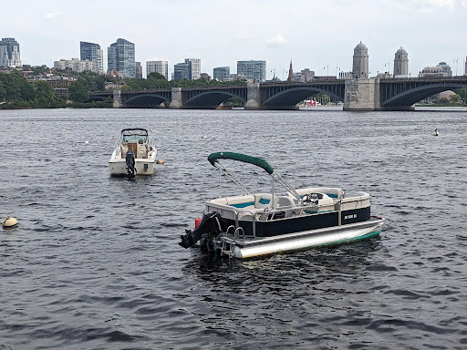

Í∑∏Î¶ºÏóê ÏûàÎäî ÎèÑÏãúÍ∞Ä Ïñ¥ÎîîÏù∏ÏßÄ Ï∞æÏïÑÏ§ò?

-------Response--------
 Ïù¥ ÏÇ¨ÏßÑÏùÄ Î≥¥Ïä§ÌÑ¥ ÏãúÎÇ¥Î•º Ï∞∞Ïä§ Í∞ï Í±¥ÎÑàÌé∏ÏóêÏÑú Ï∞çÏùÄ Í≤ÉÏûÖÎãàÎã§. ÏÇ¨ÏßÑÏùò ÏôºÏ™ΩÏóê ÏûàÎäî Îã§Î¶¨Îäî Î°†Ïä§Ìé†Î°úÏö∞ Îã§Î¶¨Ïù¥Í≥†, Ïò§Î•∏Ï™ΩÏóê ÏûàÎäî Îã§Î¶¨Îäî Î≥¥Ïä§ÌÑ¥ ÎåÄÌïôÍµê Îã§Î¶¨ÏûÖÎãàÎã§. ÏÇ¨ÏßÑ Ï§ëÏïôÏóê ÏûàÎäî Í±¥Î¨ºÏùÄ Ï°¥ Ìï∏ÏΩï ÌÉÄÏõåÏûÖÎãàÎã§.

In [ ]:
# Load image from Cloud Storage URI
image_url = (
    "https://storage.googleapis.com/cloud-samples-data/generative-ai/image/boats.jpeg"
)

# Prepare contents
image = download_image(image_url)
prompt = "Í∑∏Î¶ºÏóê ÏûàÎäî ÎèÑÏãúÍ∞Ä Ïñ¥ÎîîÏù∏ÏßÄ Ï∞æÏïÑÏ§ò?"
contents = [image, prompt]

response = model.generate_content(contents)

print("-------Prompt--------")
print_multimodal_prompt(contents)

print("\n-------Response--------")
print(response.text, end="")